In [154]:
import pandas as pd

## Series and DataFrame

In [155]:
series = pd.Series(["BMW", "Marcedes", "Ferrari"])
#Series -> 1-Dimensional
series

0         BMW
1    Marcedes
2     Ferrari
dtype: object

In [156]:
colors = pd.Series(["Black", "Silver", "Red"])
colors

0     Black
1    Silver
2       Red
dtype: object

In [157]:
#DataFrame -> 2-Dimensional
car_data = pd.DataFrame({"Brand": series, "Color": colors})
car_data

,Brand,Color
0,BMW,Black
1,Marcedes,Silver
2,Ferrari,Red


In [158]:
#import from source
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [159]:
#Export
car_sales.to_csv("exported_car_sales.csv", index=False) 
#if index=False is not set, index (0, 1, ..) will be considered as a seperate column in exported file
exported_car_sales = pd.read_csv("exported_car_sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


---

## Describe Data,

<p>Attribute vs Function is Attribute doesn't have parenthesis at the end but Function has</p>

In [160]:
#Attributes
car_sales.dtypes #shows the data types of columns

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [161]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [162]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [163]:
#Functions
car_sales.describe() #works only for numeric data

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [164]:
# Statistical Functions (mean, median, sum etc.)
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [165]:
car_sales["Doors"].sum() #only for Doors column

40

---

## Select and View

In [166]:
car_sales.head() #by default returns top 5 rows if no arguments are passed

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [167]:
car_sales.tail() #returns last 5 rows by default

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [168]:
animals = pd.Series(["Lion", "Tiger", "Cheetah", "Bear", "Crocodile", "Giraffe", "Horse"], index=[2,1,3,5,2,7,6])
animals

2         Lion
1        Tiger
3      Cheetah
5         Bear
2    Crocodile
7      Giraffe
6        Horse
dtype: object

In [169]:
animals.loc[2] #loc refers to index number

2         Lion
2    Crocodile
dtype: object

In [170]:
animals.loc[5]

'Bear'

In [171]:
car_sales.loc[4]

Make                Nissan
Colour               White
Odometer (KM)       213095
Doors                    4
Price            $3,500.00
Name: 4, dtype: object

In [172]:
animals.iloc[2] #iloc refers to position number

'Cheetah'

In [173]:
car_sales.loc[:3] #gives rows upto index 3. Same as head(4)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [174]:
car_sales.iloc[:3] #gives 3 rows. Same as head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [175]:
car_sales[car_sales["Odometer (KM)"] > 100000 ]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [176]:
# compare two columns
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [177]:
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [178]:
#convert price to integer from object
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)

In [179]:
import matplotlib.pyplot as plt

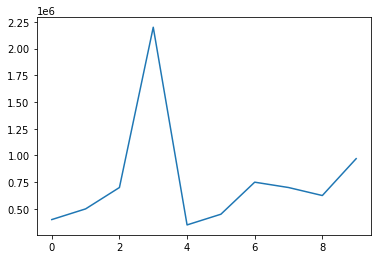

In [180]:
car_sales["Price"].plot()

---

## Data Manipulation

In [181]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [182]:
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [183]:
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [184]:
car_sales_missing_dropped.to_csv("car-sales-missing-dropped.csv")

In [185]:
seats_column = pd.Series([4, 4, 2, 5, 2, 4])
car_sales["Seats"] = seats_column

In [186]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,400000,4.0
1,Honda,Red,87899,4,500000,4.0
2,Toyota,Blue,32549,3,700000,2.0
3,BMW,Black,11179,5,2200000,5.0
4,Nissan,White,213095,4,350000,2.0
5,Toyota,Green,99213,4,450000,4.0
6,Honda,Blue,45698,4,750000,NaN
7,Honda,Blue,54738,4,700000,NaN
8,Toyota,White,60000,4,625000,NaN
9,Nissan,White,31600,4,970000,NaN


In [187]:
car_sales["Seats"].fillna(5, inplace=True)

In [188]:
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel (L) Per KM"] = fuel_economy

In [189]:
car_sales["Total Fuel Used (L)"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel (L) Per KM"]

In [190]:
car_sales["Passed Road Safety"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) Per KM,Total Fuel Used (L),Passed Road Safety
0,Toyota,White,150043,4,400000,4.0,7.5,11253.225,True
1,Honda,Red,87899,4,500000,4.0,9.2,8086.708,True
2,Toyota,Blue,32549,3,700000,2.0,5.0,1627.450,True
3,BMW,Black,11179,5,2200000,5.0,9.6,1073.184,True
4,Nissan,White,213095,4,350000,2.0,8.7,18539.265,True
5,Toyota,Green,99213,4,450000,4.0,4.7,4663.011,True
6,Honda,Blue,45698,4,750000,5.0,7.6,3473.048,True
7,Honda,Blue,54738,4,700000,5.0,8.7,4762.206,True
8,Toyota,White,60000,4,625000,5.0,3.0,1800.000,True
9,Nissan,White,31600,4,970000,5.0,4.5,1422.000,True


In [191]:
#Data Shuffling
car_sales_shuffled = car_sales.sample(frac=1) #frac= 0->1 how many percentage of rows should be shuffled
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) Per KM,Total Fuel Used (L),Passed Road Safety
0,Toyota,White,150043,4,400000,4.0,7.5,11253.225,True
9,Nissan,White,31600,4,970000,5.0,4.5,1422.000,True
1,Honda,Red,87899,4,500000,4.0,9.2,8086.708,True
2,Toyota,Blue,32549,3,700000,2.0,5.0,1627.450,True
5,Toyota,Green,99213,4,450000,4.0,4.7,4663.011,True
7,Honda,Blue,54738,4,700000,5.0,8.7,4762.206,True
3,BMW,Black,11179,5,2200000,5.0,9.6,1073.184,True
8,Toyota,White,60000,4,625000,5.0,3.0,1800.000,True
6,Honda,Blue,45698,4,750000,5.0,7.6,3473.048,True
4,Nissan,White,213095,4,350000,2.0,8.7,18539.265,True


In [192]:
#reset shuffling
car_sales_shuffled.reset_index(drop=True, inplace=True)
car_sales_shuffled["Odometer (KM)"] = car_sales_shuffled["Odometer (KM)"].apply(lambda x: x / 1.6093)

In [194]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel (L) Per KM,Total Fuel Used (L),Passed Road Safety
0,Toyota,White,93234.946871,4,400000,4.0,7.5,11253.225,True
1,Nissan,White,19635.866526,4,970000,5.0,4.5,1422.000,True
2,Honda,Red,54619.399739,4,500000,4.0,9.2,8086.708,True
3,Toyota,Blue,20225.563910,3,700000,2.0,5.0,1627.450,True
4,Toyota,Green,61649.785621,4,450000,4.0,4.7,4663.011,True
5,Honda,Blue,34013.546262,4,700000,5.0,8.7,4762.206,True
6,BMW,Black,6946.498478,5,2200000,5.0,9.6,1073.184,True
7,Toyota,White,37283.290872,4,625000,5.0,3.0,1800.000,True
8,Honda,Blue,28396.197104,4,750000,5.0,7.6,3473.048,True
9,Nissan,White,132414.714472,4,350000,2.0,8.7,18539.265,True
